##10.1 Final Analysis Questions (Code Answers Tasks 5-10)

Import Libraries, Datasets

Additional Setup

 Pandas warnings and settings

Merging departments with main dataset

User Profile for Age groups

Income_group:Profile Creation

-Sampling Data Set

-Age_group: Profile and Visualizations

User Profile for Income Groups

# User Profile for Family Status

# Profile for Department goods

# Profile for Loyalty Flag

Department and Product Further Analysis

Department: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

Top 10 Produce Items subset

Exporting Data

# Import Libraries, Datasets and Set PD code

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
# Creating a path
path= r'C:\Users\evygi\OneDrive\Documents\Instacart Basket Analysis'

In [3]:
#Importing dataset departments_wrangled
df_depts=pd.read_csv(os.path.join(path, '02. Data\Prepared data\departments_wrangled.csv'))
df_depts.shape

(21, 2)

In [4]:
#importing data frame\n",
df_merged = pd.read_pickle(os.path.join(path, '02. Data\Prepared data\df_normal_activity.pkl'))

In [5]:
df_merged.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id_x,...,State,Age,Number_of_Dependants,Familial_Status,income,_merge,region,spender_flag,regional_flag,activity_flag
0,0,0,2539329,1,prior,1,2,8,NaN,1,...,Alabama,31,3,married,40423,both,South,NaN,West,normal activity
1,0,0,2539329,1,prior,1,2,8,NaN,1,...,Alabama,31,3,married,40423,both,South,NaN,West,normal activity
2,0,0,2539329,1,prior,1,2,8,NaN,1,...,Alabama,31,3,married,40423,both,South,NaN,West,normal activity
3,0,0,2539329,1,prior,1,2,8,NaN,1,...,Alabama,31,3,married,40423,both,South,NaN,West,normal activity
4,0,0,2539329,1,prior,1,2,8,NaN,1,...,Alabama,31,3,married,40423,both,South,NaN,West,normal activity


In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462502 entries, 0 to 462501
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Unnamed: 0.1           462502 non-null  int64   
 1   Unnamed: 0             462502 non-null  int64   
 2   order_id               462502 non-null  object  
 3   user_id                462502 non-null  object  
 4   eval_set               462502 non-null  object  
 5   order_number           462502 non-null  int64   
 6   orders_day_of_week     462502 non-null  int64   
 7   order_hour_of_day      462502 non-null  int64   
 8   days_since_last_order  432195 non-null  float64 
 9   product_id_x           462502 non-null  int64   
 10  product_name           462395 non-null  object  
 11  aisle_id               462502 non-null  int64   
 12  department_id          462502 non-null  int64   
 13  prices                 462502 non-null  float64 
 14  product_id_y        

In [7]:
# import this new dataframe as a pickle file.
df_merged1 =pd.read_pickle(os.path.join(path, '02. Data\Prepared data', 'orders_products_all.pkl'))

In [8]:
#creating PD setting, display max columns 100 and max rows 100
pd.set_option('display.max_rows', 100, 'display.max_columns', 100,)

In [9]:
#supressing scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [10]:
#turning of warning feature
import warnings
warnings.filterwarnings('ignore')

# Merging Depertments with main dataset

Merging df_depts with ords_prods_active to get department names for analysis

In [11]:
#check
df_depts.head(5)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
#rennaming unnamed column to department_id
df_depts.rename (columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_depts.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
df_merged1 = df_merged.merge(df_depts, on = 'department_id')

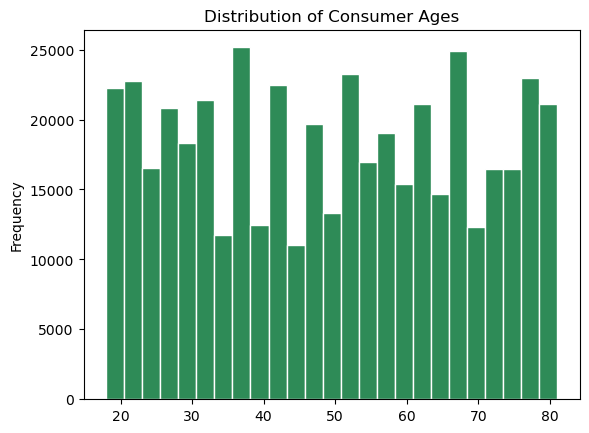

In [20]:
# creating histogram object to show distribution of consumer ages to determine flag criteria
age_histogram =df_merged['Age'].plot.hist(title='Distribution of Consumer Ages', xlabel='Consumer Age', ylabel='Distribution', color='seagreen', edgecolor='white',bins =25)
plt.savefig('age_histogram.png')
plt.show()

In [23]:
#creation of age_group flag to group ages together by inciments of 10 
df_merged1.loc[(df_merged1['Age'] >=18) & (df_merged1['Age'] <28), 'age_group'] = '18_27'
df_merged1.loc[(df_merged1['Age'] >=28) & (df_merged1['Age'] <38), 'age_group'] = '28_37'
df_merged1.loc[(df_merged1['Age'] >=38) & (df_merged1['Age'] <48), 'age_group'] = '38_47'
df_merged1.loc[(df_merged1['Age'] >=48) & (df_merged1['Age'] <58), 'age_group'] = '48_57'
df_merged1.loc[(df_merged1['Age'] >=58) & (df_merged1['Age'] <68), 'age_group'] = '58_67'
df_merged1.loc[(df_merged1['Age'] >=68), 'age_group'] = '68_over'

#checking for NaN values
df_merged1['age_group'].value_counts(dropna = False) 

68_over    96365
18_27      78442
58_67      76873
48_57      73600
28_37      72228
38_47      64994
Name: age_group, dtype: int64

Samling Data Set¶

In [24]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_merged1)) <= 0.7

# store 70% of the sample in the df_opd_big and 30% in df_opd_small
df_merged1_big = df_merged1[dev]
df_merged1_small = df_merged1[~dev]

#quality check
len(df_merged1_big)+len(df_merged1_small)

462502

In [25]:
len(df_merged1_big)

323835

In [26]:
len(df_merged1_small)

138667

In [27]:
#quality check of main dataset
len(df_merged1)

462502

# Age_group: Profile and Visualizations

In [29]:
# user_profile of subset of 30% sample df_opd_small only containing necessary columns for analysis
df_age_group_sample = df_merged1_small[['Age','regional_flag','age_group','orders_day_of_week', 'order_hour_of_day','department','prices','order_id']]
df_age_group_sample.shape

(138667, 8)

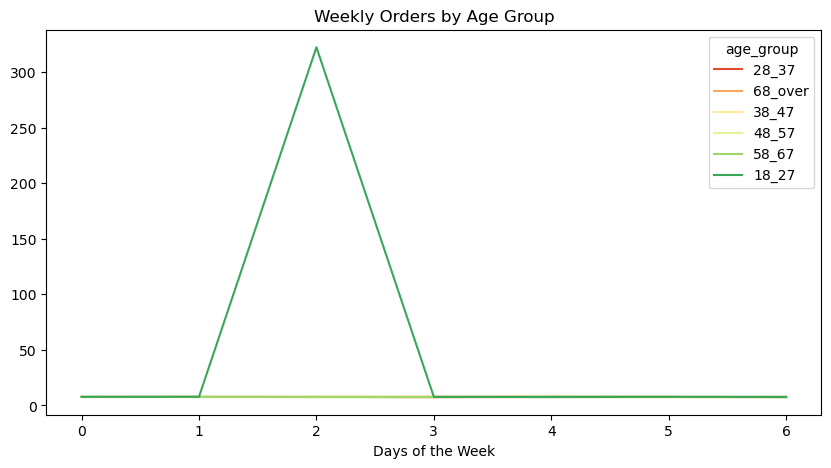

In [30]:
#linechart for DOW and age
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_age_group_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='age_group', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Weekly Orders by Age Group")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('Age_group_dow.png')
plt.show()

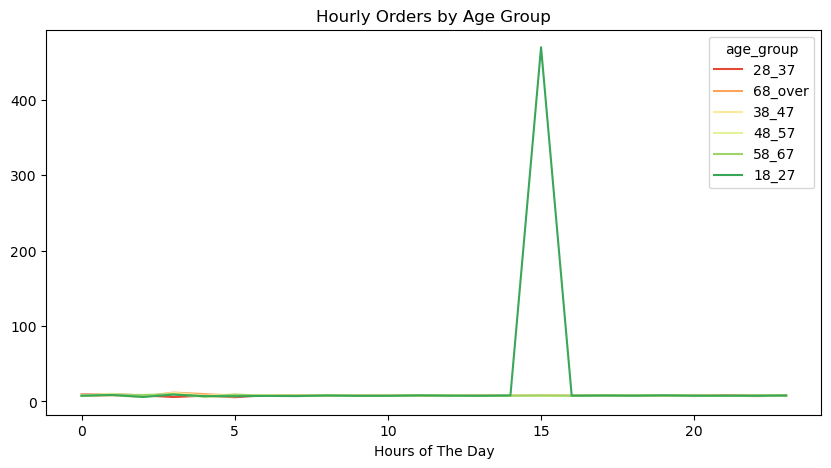

In [31]:
#linechart for HOD and age
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_age_group_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='age_group', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Hourly Orders by Age Group")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('Age_group_HOD.png')
plt.show()

In [32]:
#aggregating 'order_id' and 'prices' from sample
df_age_group_sample_agg = df_age_group_sample.groupby(['department', 'age_group','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_age_group_sample_agg.head(3)

,department,age_group,regional_flag,order_id,prices
0,alcohol,18_27,Northeast,71,545.00
1,alcohol,18_27,South,186,1454.50
2,alcohol,18_27,West,254,2281.00


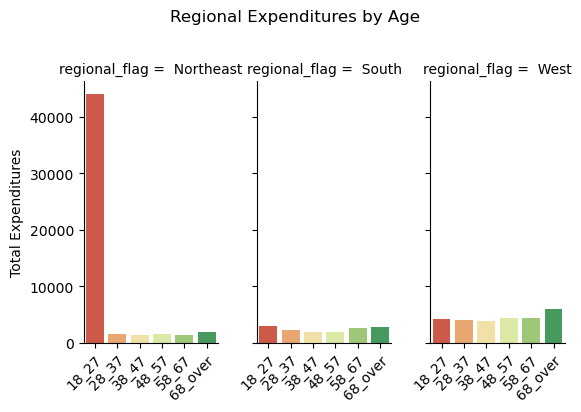

In [33]:
### FacetGrid for age_group and Revenue
g = sns.FacetGrid(df_age_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "age_group", "prices", palette='RdYlGn',ci=None, order=['18_27','28_37','38_47','48_57','58_67','68_over'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Age")
g.figure.subplots_adjust(top=.8)

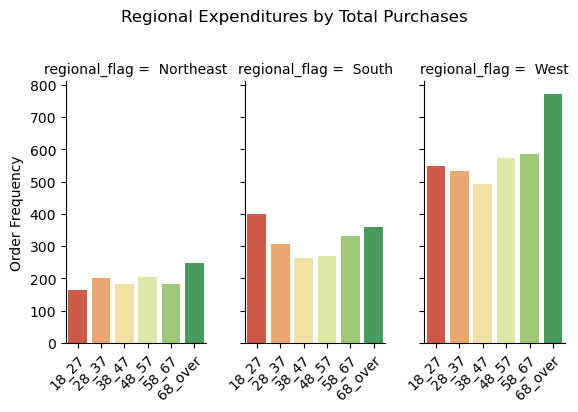

In [34]:
# FacetGrid for age_group and Total Purchases
g = sns.FacetGrid(df_age_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "age_group", "order_id", palette='RdYlGn',ci=None, order=['18_27','28_37','38_47','48_57','58_67','68_over'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Expenditures by Total Purchases")
g.figure.subplots_adjust(top=.8)

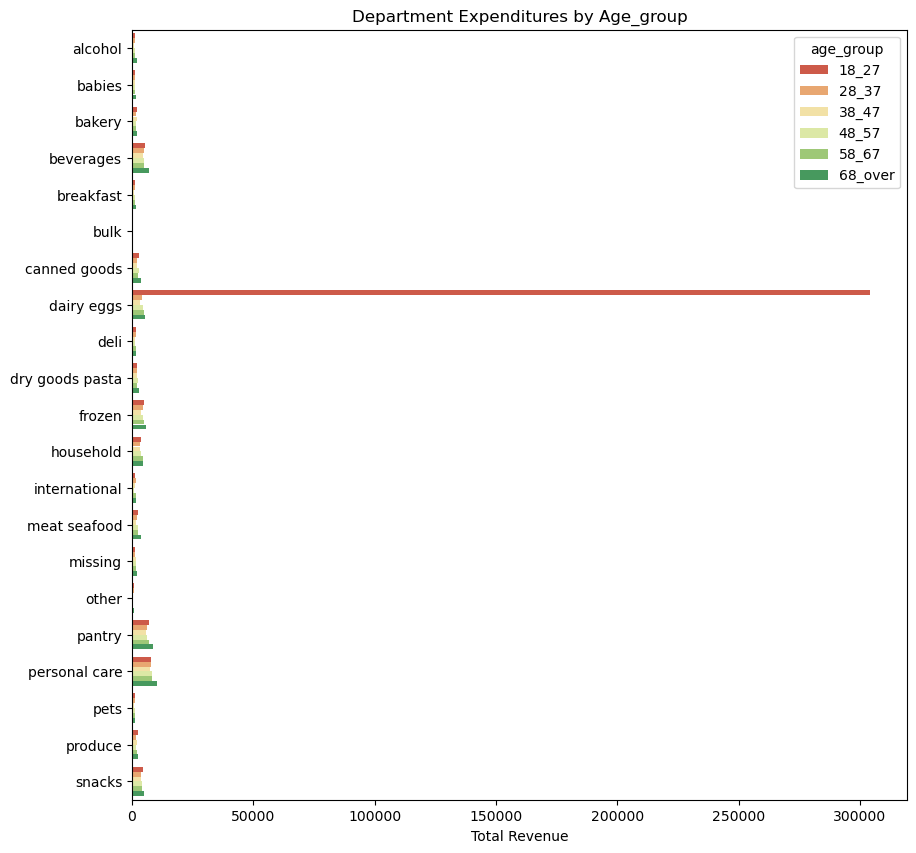

In [35]:
#barplot for Age-group and departments expenditures and frequency
plt.figure(figsize=(10, 10))

sns.barplot(data = df_age_group_sample_agg, 
             x='prices',          
             y = 'department', 
             hue='age_group', 
             palette = 'RdYlGn',
             estimator= np.mean,
             ci=None
            )

plt.title("Department Expenditures by Age_group")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig('Age_group_department_Expenditures.png')
plt.show()

<Figure size 700x1000 with 0 Axes>

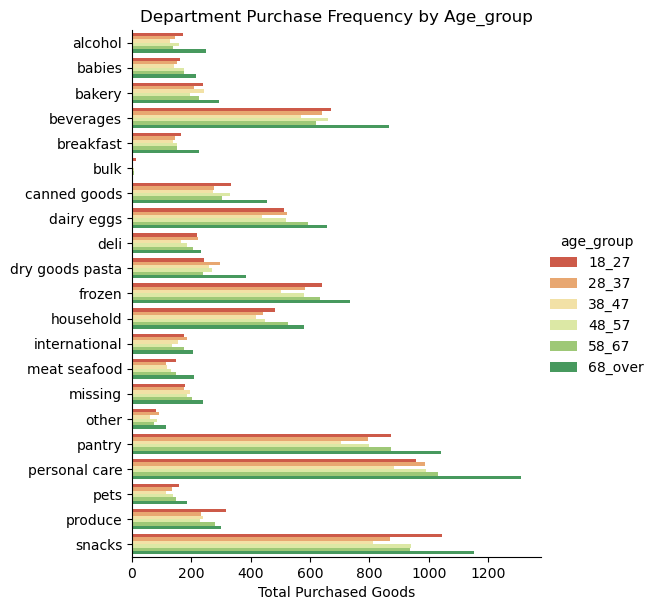

In [36]:
#barplot for Age-group and departments expenditures and frequency
plt.figure(figsize=(7, 10))

sns.catplot(data = df_age_group_sample_agg,          
             kind="bar", 
             x='order_id',
             y ='department',  
             hue='age_group', 
             errorbar="sd",
             palette = 'RdYlGn',
             height=6,
             ci=None
            )

plt.title("Department Purchase Frequency by Age_group")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig('Age_group_freq_purchases.png')
plt.show()

# Age_group: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [37]:
# aggregated Data from TOTAL Dataset for age_group 
df_merged1.groupby('age_group').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order             prices                    
               mean max min        sum  mean      max  min
age_group                                                 
18_27         34.86  99   3 3802298.20 48.47 99999.00 1.00
28_37         33.10  99   3  553219.80  7.66    25.00 1.00
38_47         30.92  99   3  527706.20  8.12 14900.00 1.00
48_57         29.70  99   3  568216.10  7.72    25.00 1.00
58_67         33.64  99   3  595363.30  7.74    25.00 1.00
68_over       30.19  99   3  747078.60  7.75    25.00 1.00

# User Profile for Income Groups

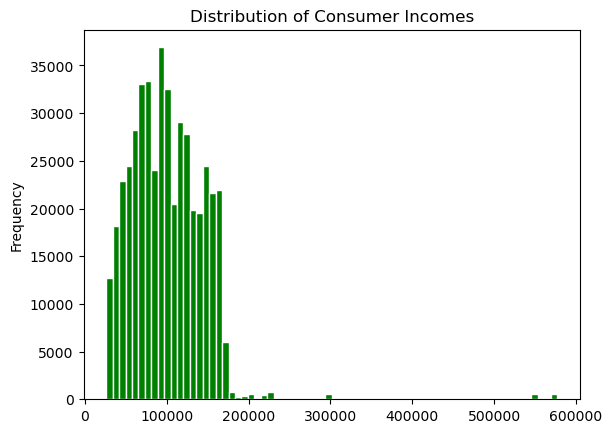

In [39]:
# creating histogram object
income_histogram = df_merged1['income'].plot.hist(title='Distribution of Consumer Incomes', xlabel='Income', ylabel='Frequency', color='green', edgecolor='white',bins =70)
plt.savefig('income_histogram.png')
plt.show()

In [40]:
#Descriptives of income column
df_merged1['income'].describe()

count   462502.00
mean    100579.64
std      46700.65
min      26137.00
25%      67392.00
50%      96630.00
75%     130675.00
max     576876.00
Name: income, dtype: float64

In [41]:
#Creating User flag for income_group 
df_merged1.loc[(df_merged1['income'] <=67292), 'income_group'] = 'Lowest_income'
df_merged1.loc[(df_merged1['income'] > 67292) & (df_merged1['income'] < 128102), 'income_group'] = 'Avg_income'
df_merged1.loc[(df_merged1['income'] >= 128102), 'income_group'] = 'Highest_income'

#check
df_merged1.head(3)

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id_x,product_name,aisle_id,department_id,prices,product_id_y,add_to_cart_order,reordered,price_range_loc,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,order_frequency,order_frequency_flag,First Name,Last Name,Gender,State,Age,Number_of_Dependants,Familial_Status,income,_merge,region,spender_flag,regional_flag,activity_flag,department,age_group,income_group
0,0,0,2539329,1,prior,1,2,8,NaN,1,Chocolate Sandwich Cookies,61,19,5.80,196,1,0,NaN,Mid-range product,Regular busy,Average orders,10,New customer,5.95,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,NaN,West,normal activity,snacks,28_37,Lowest_income
1,0,0,2539329,1,prior,1,2,8,NaN,1,Chocolate Sandwich Cookies,61,19,5.80,14084,2,0,NaN,Mid-range product,Regular busy,Average orders,10,New customer,5.95,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,NaN,West,normal activity,snacks,28_37,Lowest_income
2,0,0,2539329,1,prior,1,2,8,NaN,1,Chocolate Sandwich Cookies,61,19,5.80,12427,3,0,NaN,Mid-range product,Regular busy,Average orders,10,New customer,5.95,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,NaN,West,normal activity,snacks,28_37,Lowest_income


# Sampling Data Set

#Copy pasting data set from age_group to include new flag 'income_group

In [42]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_merged1)) <= 0.7

# store 70% of the sample in the df_opd_big and 30% in df_opd_small
df_merged1_big2 = df_merged1[dev]
df_merged1_small2 = df_merged1[~dev]

#quality check
len(df_merged1_big2)+len(df_merged1_small2)

462502

In [43]:
# user_profile of subset of 30% sample df_opd_small2 only containing necessary columns for analysis
df_income_group_sample = df_merged1_small2[['regional_flag','income_group','orders_day_of_week', 'order_hour_of_day','department','prices','order_id']]
df_income_group_sample.head()

,regional_flag,income_group,orders_day_of_week,order_hour_of_day,department,prices,order_id
0,West,Lowest_income,2,8,snacks,5.80,2539329
2,West,Lowest_income,2,8,snacks,5.80,2539329
3,West,Lowest_income,2,8,snacks,5.80,2539329
6,West,Lowest_income,3,11,snacks,5.20,1673511
10,West,Lowest_income,3,11,snacks,5.20,1673511


# Income_group: Visualizations

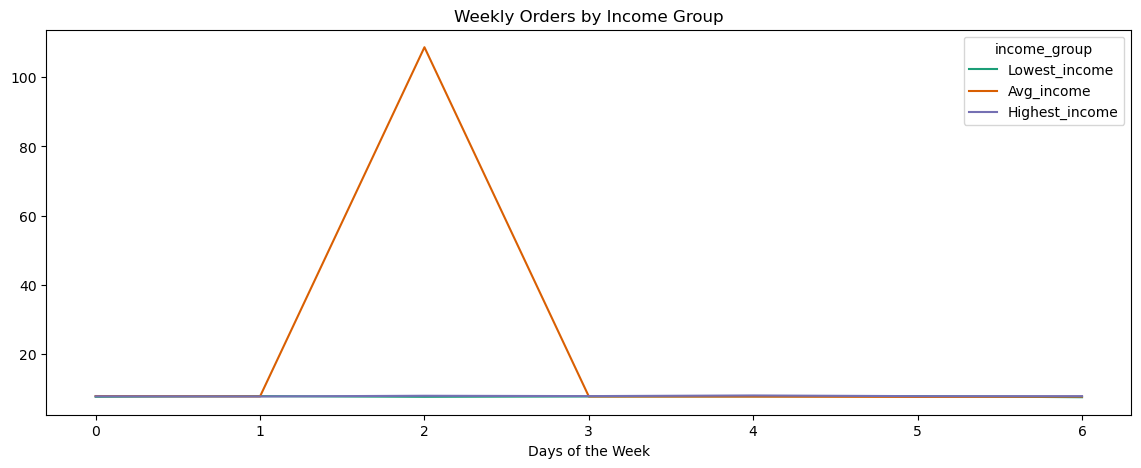

In [44]:
#linechart for DOW and income
plt.figure(figsize=(14, 5))

sns.lineplot(data = df_income_group_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='income_group', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Weekly Orders by Income Group")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('Income_group_dow.png')
plt.show()

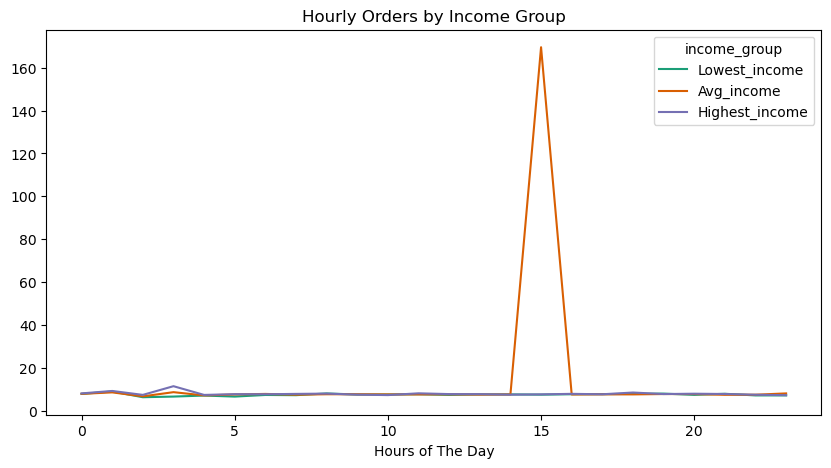

In [45]:
#linechart for HOD and income
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_income_group_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='income_group', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Hourly Orders by Income Group")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('Income_group_HOD.png')
plt.show()

# Income_group:Regional_flag and Department Analysis

In [46]:
#aggregating 'order_id' and 'prices' from sample
df_income_group_sample_agg = df_income_group_sample.groupby(['department', 'income_group','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_income_group_sample_agg.head(3)

,department,income_group,regional_flag,order_id,prices
0,alcohol,Avg_income,Northeast,275,2180.20
1,alcohol,Avg_income,South,388,3010.60
2,alcohol,Avg_income,West,760,6300.20


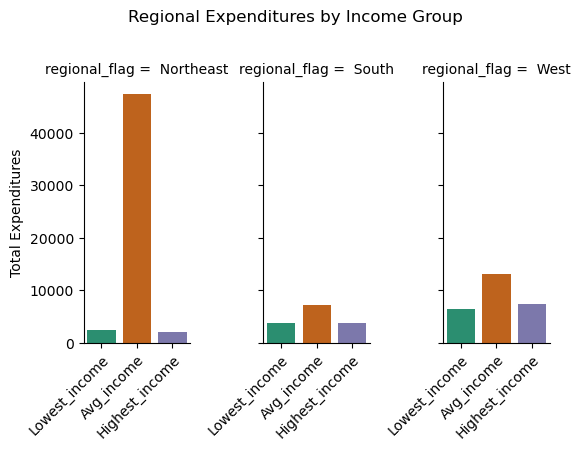

In [47]:
### FacetGrid for income_group and Revenue
g = sns.FacetGrid(df_income_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "income_group", "prices", palette='Dark2',ci=None, order=['Lowest_income', 'Avg_income','Highest_income'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Income Group")
g.figure.subplots_adjust(top=.8)

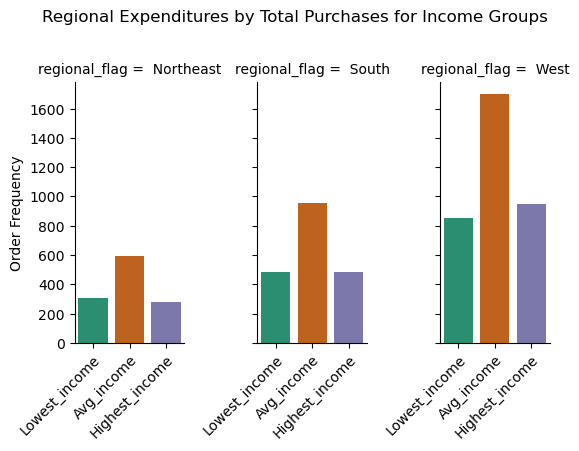

In [48]:
# FacetGrid for income_group and Total Purchases
g = sns.FacetGrid(df_income_group_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "income_group", "order_id", palette='Dark2',ci=None, order=['Lowest_income', 'Avg_income','Highest_income'])

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Expenditures by Total Purchases for Income Groups")
g.figure.subplots_adjust(top=.8)

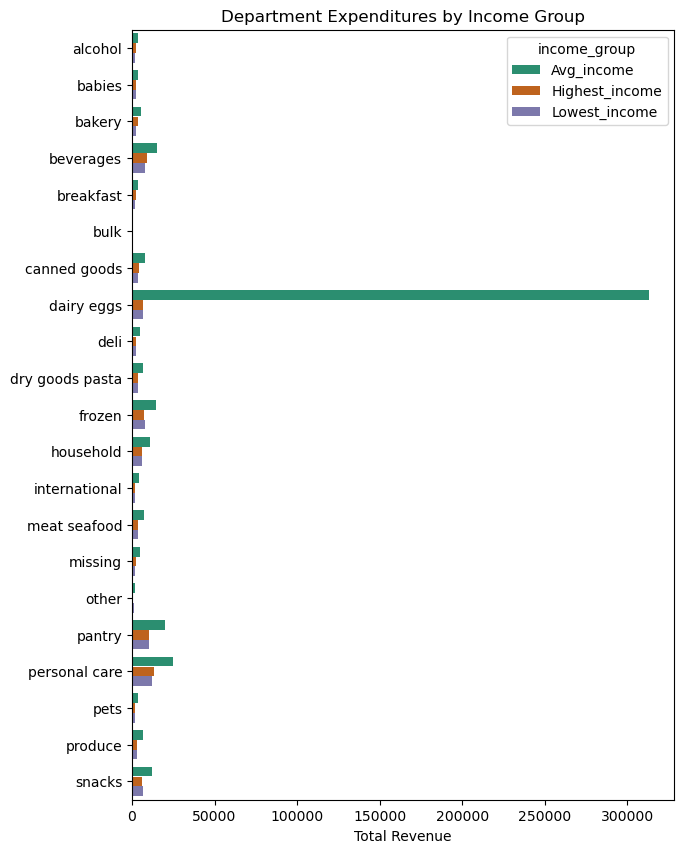

In [49]:
#barplot for income-group and departments expenditures
plt.figure(figsize=(7, 10))

sns.barplot(data = df_income_group_sample_agg, 
             x='prices',          
             y = 'department', 
             hue='income_group', 
             palette = 'Dark2',
             estimator= np.mean,
             ci=None
            )

plt.title("Department Expenditures by Income Group")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig('income_group_department_Expenditures.png')
plt.show()

<Figure size 700x1000 with 0 Axes>

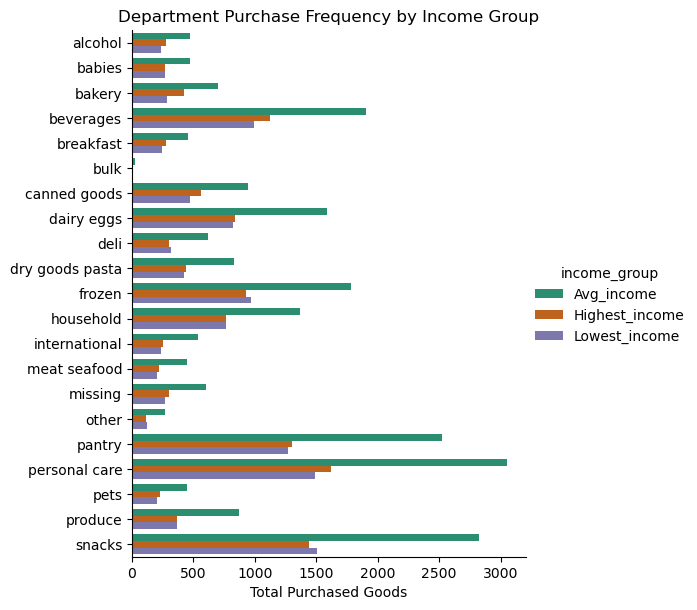

In [50]:
#barplot for income_group and departments frequency
plt.figure(figsize=(7, 10))

sns.catplot(data = df_income_group_sample_agg,          
             kind="bar", 
             x='order_id',
             y ='department',  
             hue='income_group', 
             errorbar="sd",
             palette = 'Dark2',
             height=6,
             ci=None
            )

plt.title("Department Purchase Frequency by Income Group")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig('income_group_freq_purchases.png')
plt.show()

# Income_group: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [51]:
# aggregated Data from TOTAL Dataset for income_group 
df_merged1.groupby('income_group').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order             prices                    
                    mean max min        sum  mean      max  min
income_group                                                   
Avg_income         32.59  99   3 4942279.90 21.77 99999.00 1.00
Highest_income     31.97  99   3  937546.00  7.79    25.00 1.00
Lowest_income      31.02  99   3  914056.30  7.94 14900.00 1.00

# User Profile for Family Size

Family_size: Creating Flag for Family Status

In [53]:
#checking values of n_dependants column
df_merged1['Number_of_Dependants'].value_counts()

2    119329
1    116557
3    115883
0    110733
Name: Number_of_Dependants, dtype: int64

In [55]:
#checking values of fam_status column
df_merged1['Familial_Status'].value_counts()

married                             328759
single                               72350
divorced/widowed                     38383
living with parents and siblings     23010
Name: Familial_Status, dtype: int64

In [57]:
#Creating User flag for family_size 
df_merged1.loc[(df_merged1['Familial_Status'] == 'married') & (df_merged1['Number_of_Dependants'] == 0), 'family_size'] = 'Married_no_kids'
df_merged1.loc[(df_merged1['Familial_Status'] == 'married') & (df_merged1['Number_of_Dependants'] >= 1), 'family_size'] = 'Married_kids'
df_merged1.loc[(df_merged1['Familial_Status'] == 'single') & (df_merged1['Number_of_Dependants'] >= 1), 'family_size'] = 'Single_kids'
df_merged1.loc[(df_merged1['Familial_Status'] == 'single') & (df_merged1['Number_of_Dependants'] == 0), 'family_size'] = 'Single_no_kids'
df_merged1.loc[(df_merged1['Familial_Status'] == 'divorced/widowed') & (df_merged1['Number_of_Dependants'] == 0), 'family_size'] = 'Divorced/widowed_no_kids'
df_merged1.loc[(df_merged1['Familial_Status'] == 'divorced/widowed') & (df_merged1['Number_of_Dependants'] >= 1), 'family_size'] = 'Divorced/widowed_kids'
df_merged1.loc[(df_merged1['Familial_Status'] == 'living with parents and siblings') & (df_merged1['Number_of_Dependants'] == 0), 'family_size'] = 'Living with family_no_kids'
df_merged1.loc[(df_merged1['Familial_Status'] == 'living with parents and siblings') & (df_merged1['Number_of_Dependants'] >= 1), 'family_size'] = 'Living with family_kids'

#checking for NaN values
df_merged1['family_size'].value_counts(dropna = False)

Married_kids                328759
Single_no_kids               72350
Divorced/widowed_no_kids     38383
Living with family_kids      23010
Name: family_size, dtype: int64

In [58]:
#checking total row count
df_merged1['family_size'].count

<bound method Series.count of 0         Married_kids
1         Married_kids
2         Married_kids
3         Married_kids
4         Married_kids
              ...     
462497    Married_kids
462498    Married_kids
462499    Married_kids
462500    Married_kids
462501    Married_kids
Name: family_size, Length: 462502, dtype: object>

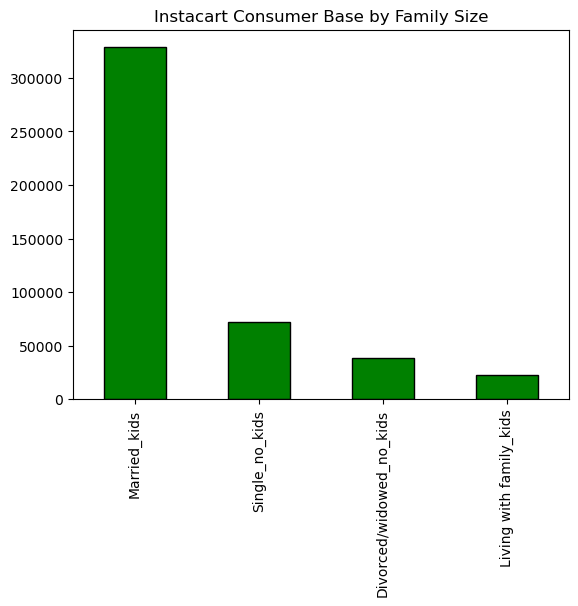

In [60]:
# creating bar object for family size to check distribution
family_size_bar =df_merged1['family_size'].value_counts().plot.bar(title='Instacart Consumer Base by Family Size', xlabel='', ylabel='', color='green', edgecolor='black')
plt.savefig('family_size_bar.png')
plt.show()

# Sampling Data Set

Copy pasting data set from age_group to include new flag 'family_size

In [61]:
#creating 70/30 split for data sample
np.random.seed(4)
dev = np.random.rand(len(df_merged1)) <= 0.7

# store 70% of the sample in the df_opd_big and 30% in df_opd_small
df_merged1_big3 = df_merged1[dev]
df_merged1_small3 = df_merged1[~dev]

#quality check
len(df_merged1_big3)+len(df_merged1_small3)

462502

# Family_size:Profile Creation

In [62]:
# user_profile of subset of 30% sample df_opd_small2 only containing necessary columns for analysis
df_family_size_sample = df_merged1_small3[['family_size','income','orders_day_of_week', 'order_hour_of_day','department','prices','order_id','regional_flag']]
df_family_size_sample.head()

,family_size,income,orders_day_of_week,order_hour_of_day,department,prices,order_id,regional_flag
0,Married_kids,40423,2,8,snacks,5.80,2539329,West
2,Married_kids,40423,2,8,snacks,5.80,2539329,West
3,Married_kids,40423,2,8,snacks,5.80,2539329,West
6,Married_kids,64940,3,11,snacks,5.20,1673511,West
10,Married_kids,64940,3,11,snacks,5.20,1673511,West


# Family_size: Visualizations

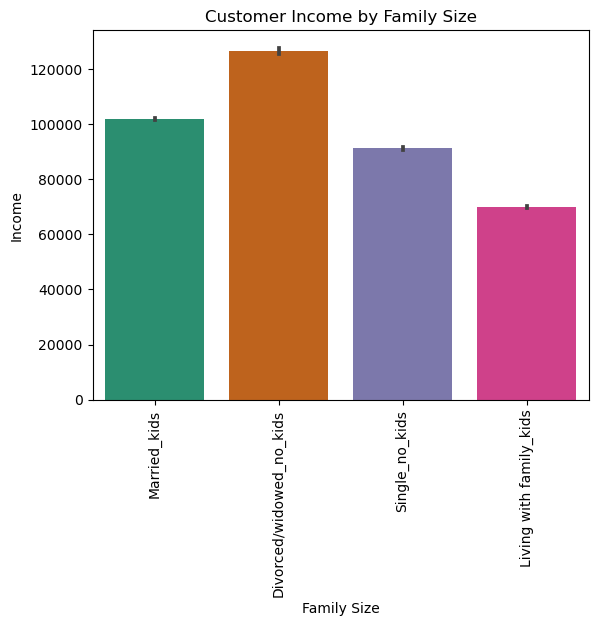

In [63]:
#creating scatterplot for family_size and income and saving it as PNG
Family_size_scatter = sns.barplot(data = df_family_size_sample, x='family_size', y='income', palette='Dark2').set(title='Customer Income by Family Size',xlabel = 'Family Size', ylabel = 'Income')
plt.savefig('Family_size_income.png')
plt.xticks(rotation='vertical')
plt.show()

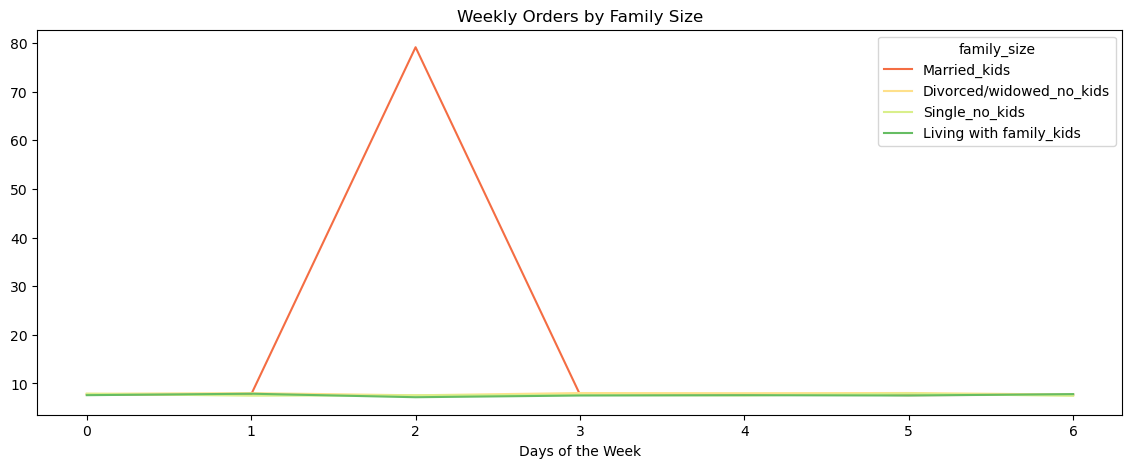

In [64]:
#linechart for DOW and family size
plt.figure(figsize=(14, 5))

sns.lineplot(data = df_family_size_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='family_size', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Weekly Orders by Family Size")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('family_size_dow.png')
plt.show()

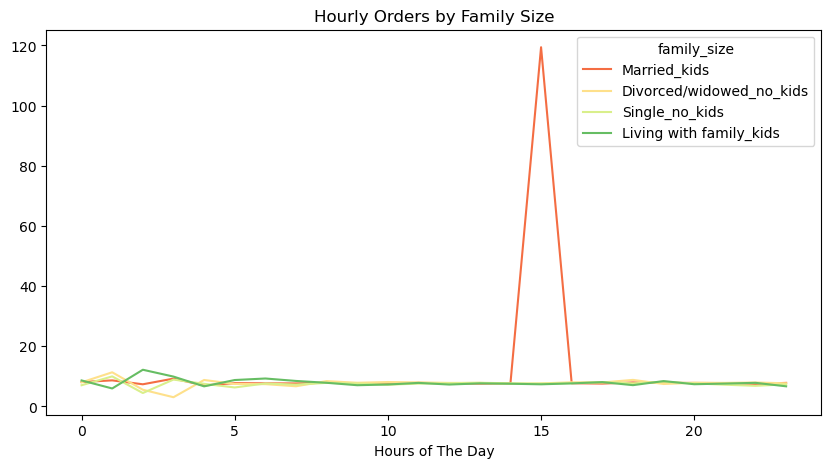

In [65]:
#linechart for HOD and family size
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_family_size_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='family_size', 
             palette = 'RdYlGn',
             ci=None
            )

plt.title("Hourly Orders by Family Size")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('family_size_HOD.png')
plt.show()

# Family_size:Regional_flag and Department Analysis

In [66]:
#aggregating 'order_id' and 'prices' from sample
df_family_size_sample_agg = df_family_size_sample.groupby(['department', 'family_size','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_family_size_sample_agg.head(3)

,department,family_size,regional_flag,order_id,prices
0,alcohol,Divorced/widowed_no_kids,Northeast,54,552.40
1,alcohol,Divorced/widowed_no_kids,South,89,773.90
2,alcohol,Divorced/widowed_no_kids,West,135,1089.80


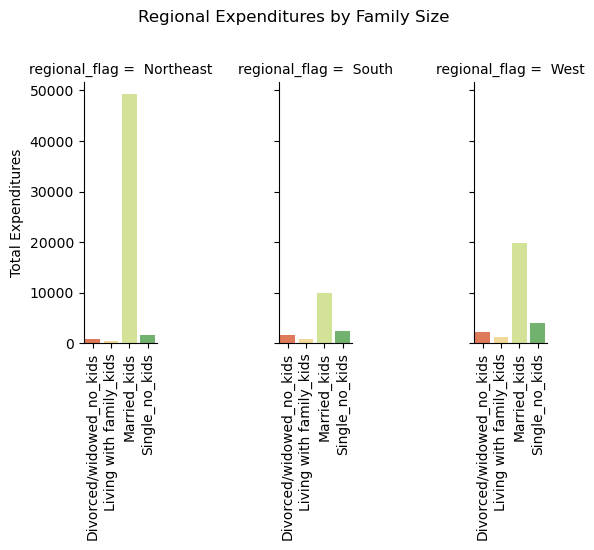

In [67]:
### FacetGrid for family_size and Revenue
g = sns.FacetGrid(df_family_size_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "family_size", "prices", palette='RdYlGn',ci=None)

g.set_xticklabels(rotation='vertical')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures by Family Size")
g.figure.subplots_adjust(top=.8)

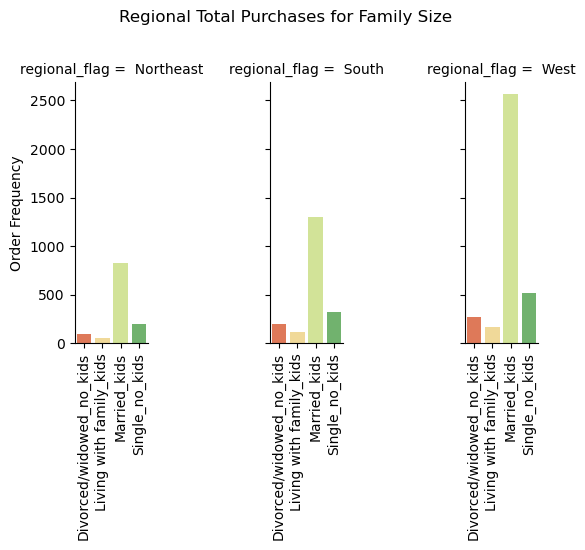

In [68]:
# FacetGrid for family_size and Total Purchases
g = sns.FacetGrid(df_family_size_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "family_size", "order_id", palette='RdYlGn',ci=None)

g.set_xticklabels(rotation='vertical')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Total Purchases for Family Size")
g.figure.subplots_adjust(top=.8)

<Figure size 700x1000 with 0 Axes>

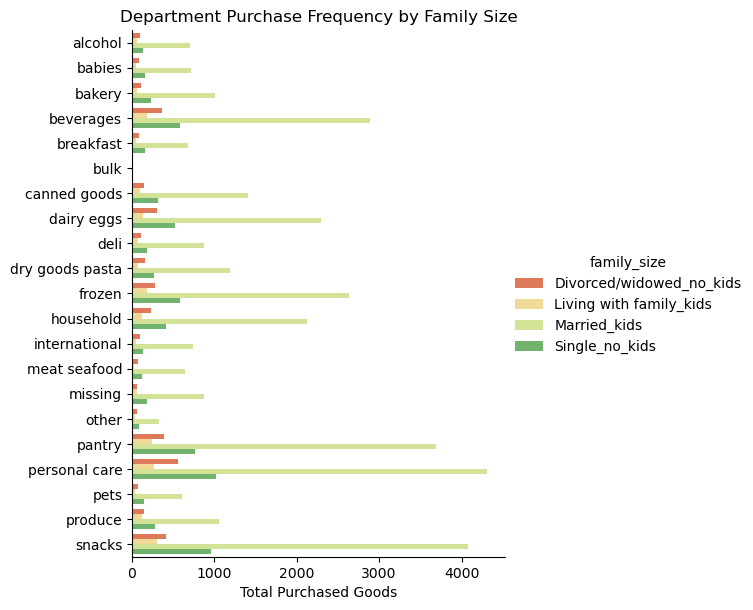

In [69]:
#barplot for family size and departments frequency
plt.figure(figsize=(7, 10))

sns.catplot(data = df_family_size_sample_agg,          
             kind="bar", 
             x='order_id',
             y ='department',  
             hue='family_size', 
             errorbar="sd",
             palette = 'RdYlGn',
             height=6,
             ci=None
            )

plt.title("Department Purchase Frequency by Family Size")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig('family_size_freq_purchases.png')
plt.show()

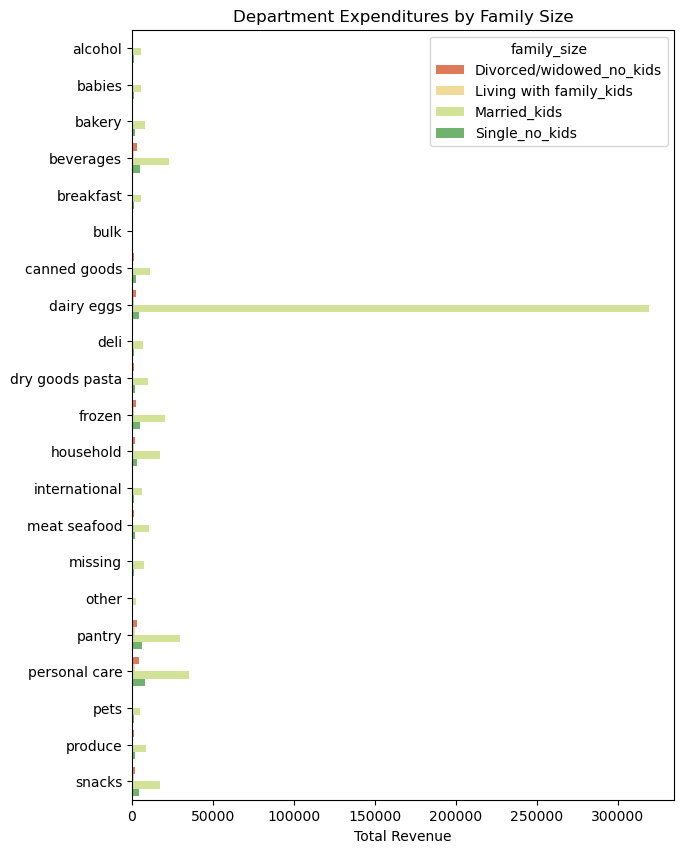

In [70]:
#barplot for family_size and departments expenditures
plt.figure(figsize=(7, 10))

sns.barplot(data = df_family_size_sample_agg, 
             x='prices',          
             y = 'department', 
             hue='family_size', 
             palette = 'RdYlGn',
             estimator= np.mean,
             ci=None
            )

plt.title("Department Expenditures by Family Size")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig('family_size_department_Expenditures.png')
plt.show()

# Family_size: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [72]:
# aggregated Data from TOTAL Dataset for family_size
df_merged1.groupby('family_size').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order             prices                    
                              mean max min        sum  mean      max  min
family_size                                                              
Divorced/widowed_no_kids     32.28  88   3  303273.00  7.90    24.90 1.00
Living with family_kids      35.36  99   3  174083.50  7.57    24.40 1.00
Married_kids                 32.03  99   3 5765465.60 17.54 99999.00 1.00
Single_no_kids               30.89  99   3  551060.10  7.62    24.80 1.00

# User Profile Loyalty Flag

In [74]:
# user_profile of subset of 30% sample df_opd_small3 only containing necessary columns for analysis
df_loyalty_sample = df_merged1_small3[['loyalty_flag','orders_day_of_week','days_since_last_order', 'order_hour_of_day','department','prices','order_id','regional_flag']]
df_loyalty_sample.head()

,loyalty_flag,orders_day_of_week,days_since_last_order,order_hour_of_day,department,prices,order_id,regional_flag
0,New customer,2,NaN,8,snacks,5.80,2539329,West
2,New customer,2,NaN,8,snacks,5.80,2539329,West
3,New customer,2,NaN,8,snacks,5.80,2539329,West
6,Regular customer,3,8.00,11,snacks,5.20,1673511,West
10,Regular customer,3,8.00,11,snacks,5.20,1673511,West


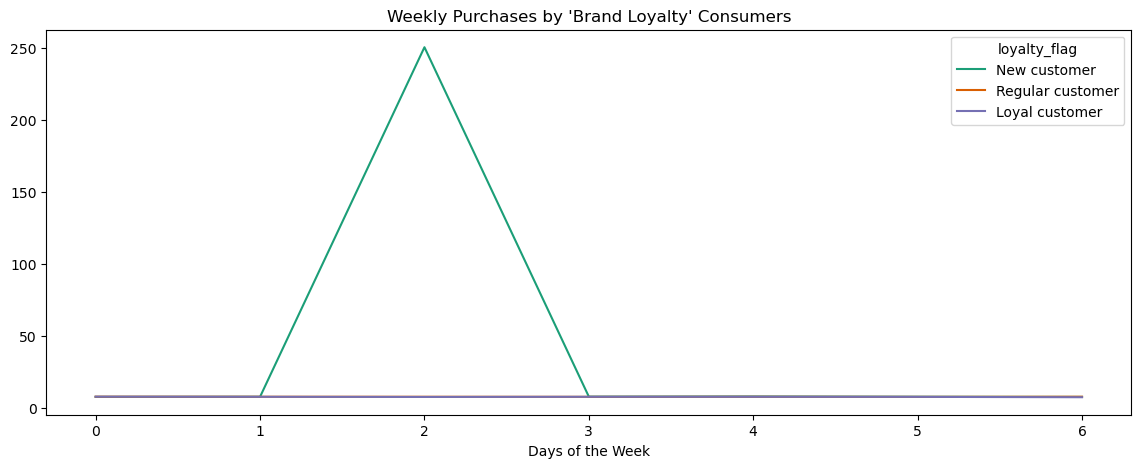

In [75]:
#linechart for DOW and Loyalty
plt.figure(figsize=(14, 5))

sns.lineplot(data = df_loyalty_sample, 
             x='orders_day_of_week', 
             y = 'prices', 
             hue='loyalty_flag', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Weekly Purchases by 'Brand Loyalty' Consumers")
plt.xlabel("Days of the Week")
plt.ylabel("")
plt.savefig('Loyalty_dow.png')
plt.show()

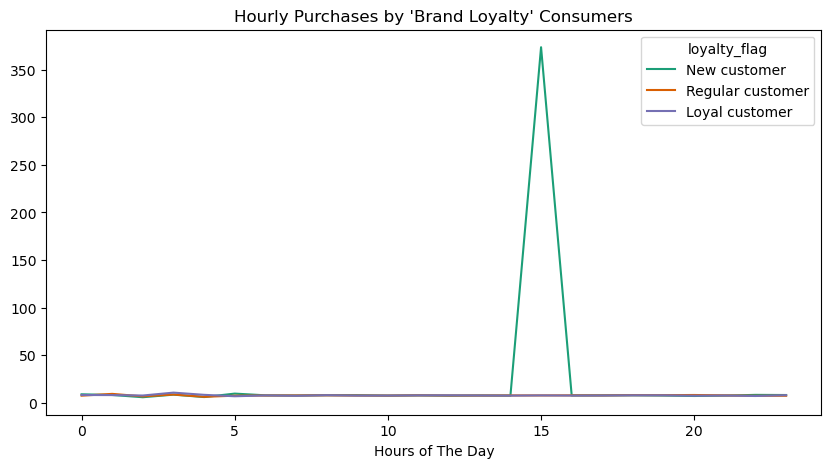

In [76]:
#linechart for HOD and Loyalty
plt.figure(figsize=(10, 5))

sns.lineplot(data = df_loyalty_sample, 
             x='order_hour_of_day', 
             y = 'prices', 
             hue='loyalty_flag', 
             palette = 'Dark2',
             ci=None
            )

plt.title("Hourly Purchases by 'Brand Loyalty' Consumers")
plt.xlabel("Hours of The Day")
plt.ylabel("")
plt.savefig('loyal_HOD.png')
plt.show()

# Loyalty_flag: Regional_flag and Department Analysis

In [77]:
#aggregating 'order_id' and 'prices' from sample
df_loyalty_sample_agg = df_loyalty_sample.groupby(['department', 'loyalty_flag','regional_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_loyalty_sample_agg.head(3)

,department,loyalty_flag,regional_flag,order_id,prices
0,alcohol,Loyal customer,South,783,6019.60
1,alcohol,New customer,Northeast,560,4634.30
2,alcohol,New customer,West,46,475.50


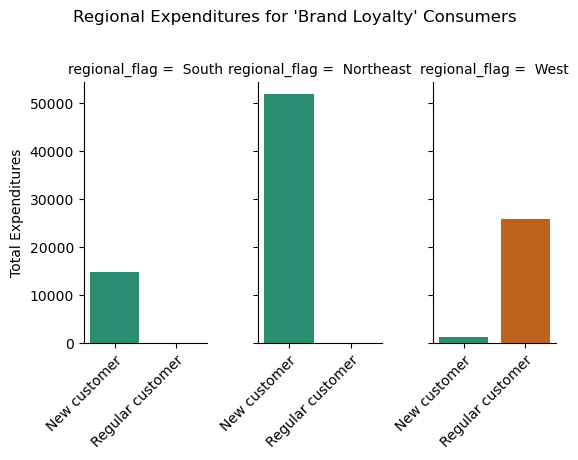

In [78]:
### FacetGrid for loyalty_flag and Revenue
g = sns.FacetGrid(df_loyalty_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "loyalty_flag", "prices", palette='Dark2',ci=None)

g.set_xticklabels(rotation=45,rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Total Expenditures")
g.fig.suptitle("Regional Expenditures for 'Brand Loyalty' Consumers")
g.figure.subplots_adjust(top=.8) 

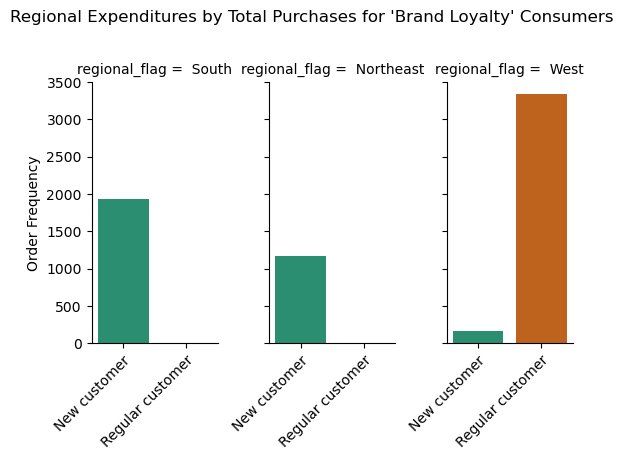

In [79]:
# FacetGrid for loyalty_flag and Total Purchases
g = sns.FacetGrid(df_loyalty_sample_agg, col="regional_flag", height=4, aspect=.5,)
g.map(sns.barplot, "loyalty_flag", "order_id", palette='Dark2',ci=None)

g.set_xticklabels(rotation=45, rotation_mode='anchor', ha='right')
g.set_axis_labels("", "Order Frequency")
g.fig.suptitle("Regional Expenditures by Total Purchases for 'Brand Loyalty' Consumers")
g.figure.subplots_adjust(top=.8)

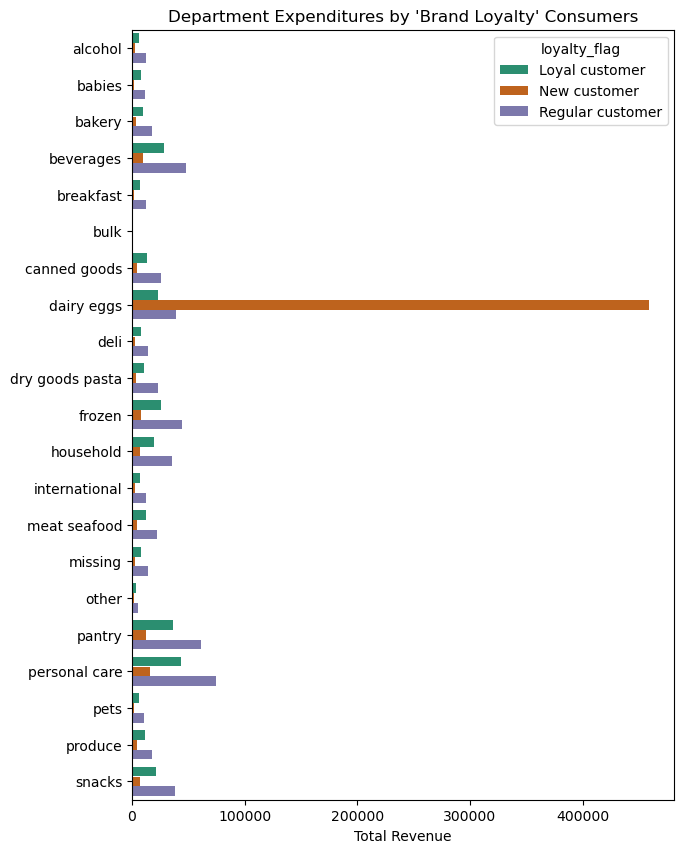

In [80]:
#barplot for loyalty and departments expenditures
plt.figure(figsize=(7, 10))

sns.barplot(data = df_loyalty_sample_agg, 
             x='prices',          
             y = 'department', 
             hue='loyalty_flag', 
             palette = 'Dark2',
             estimator= np.mean,
             ci=None
            )

plt.title("Department Expenditures by 'Brand Loyalty' Consumers")
plt.xlabel("Total Revenue")
plt.ylabel("")
plt.savefig('loyalty_department_Expenditures.png')
plt.show()

<Figure size 700x1000 with 0 Axes>

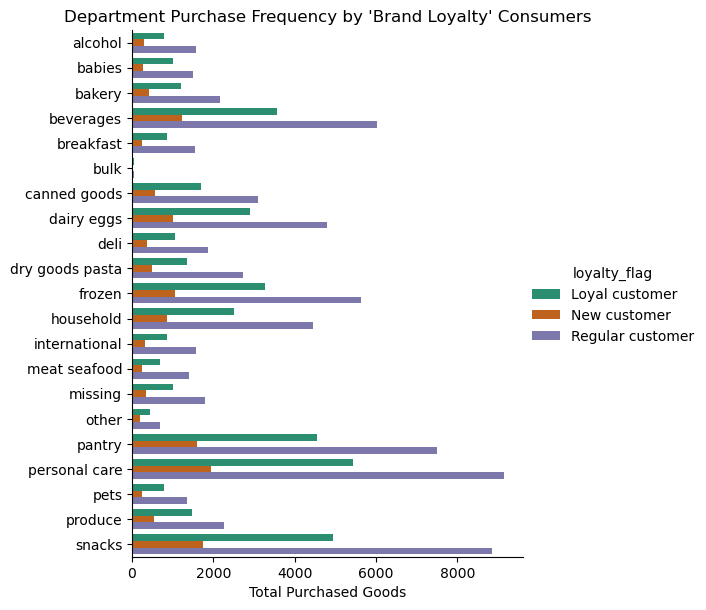

In [81]:
#barplot for loyalty and departments frequency
plt.figure(figsize=(7, 10))

sns.catplot(data = df_loyalty_sample_agg,          
             kind="bar", 
             x='order_id',
             y ='department',  
             hue='loyalty_flag', 
             errorbar="sd",
             palette = 'Dark2',
             height=6,
             ci=None
            )

plt.title("Department Purchase Frequency by 'Brand Loyalty' Consumers")
plt.xlabel("Total Purchased Goods")
plt.ylabel("")
plt.savefig('loyalty_freq_purchases.png')
plt.show()

# Loyalty_flag: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [82]:
# aggregated Data from TOTAL Dataset for loyalty_flag
df_merged.groupby('loyalty_flag').agg({'max_order': ['mean','max','min'], 'prices': ['sum','mean','max','min']})

max_order             prices                    
                      mean max min        sum  mean      max  min
loyalty_flag                                                     
Loyal customer       65.35  99  41 1035035.80  7.67    25.00 1.00
New customer          6.60  10   3 3913438.70 41.95 99999.00 1.00
Regular customer     22.98  40  11 1845407.70  7.88 14900.00 1.00

# Department and Product Further Analysis

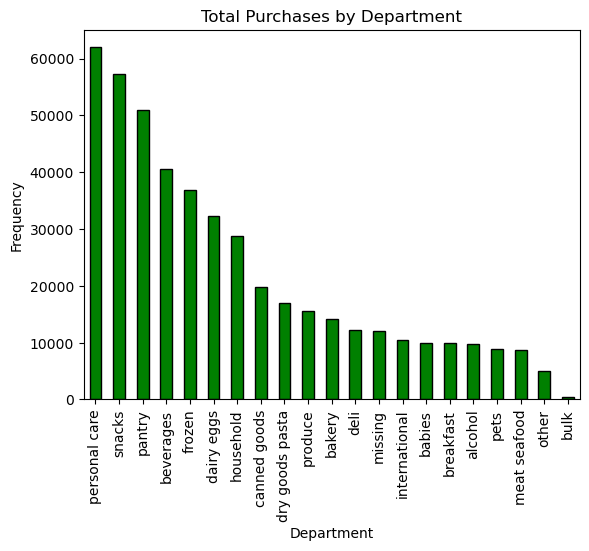

In [83]:
# creating bar object for department frequency count
department_bar_count =df_merged1['department'].value_counts().plot.bar(title='Total Purchases by Department', xlabel='Department', ylabel='Frequency', color='green', edgecolor='black')
plt.savefig('department_bar_count.png')
plt.show()

# Department: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure¶

In [84]:
# Aggregated Data from TOTAL Dataset for department
df_merged1.groupby('department').agg({'max_order': ['mean','max','min'], 'prices': ['mean','sum','max','min'], 'orders_day_of_week': ['mean'], 'order_hour_of_day': ['mean', 'min', 'max']})

max_order         prices                           \
                     mean max min   mean        sum      max  min   
department                                                          
alcohol             30.84  99   3   8.12   79017.80    15.00 1.00   
babies              34.40  99   3   8.02   80230.50    15.00 1.00   
bakery              31.46  99   3   7.95  112789.10    15.00 1.00   
beverages           32.30  99   3   7.91  321438.20    15.00 1.00   
breakfast           33.34  99   3   7.84   77262.90    14.90 1.00   
bulk                36.55  99   4   8.14    2907.40    14.10 1.40   
canned goods        31.75  99   3   8.12  160854.00    15.00 1.00   
dairy eggs          31.98  99   3 108.16 3492722.50 99999.00 1.00   
deli                32.26  99   3   7.84   95389.70    15.00 1.00   
dry goods pasta     31.45  99   3   8.07  137119.00    15.00 1.00   
frozen              32.34  99   3   7.88  290147.20    15.00 1.00   
household           31.71  99   3   8.07  231752.50    15.00 1.00   
international       31.58  99   3   8.09   85234.40    15.00 1.00   
meat seafood        31.53  99   3  16.66  146082.30    25.00 8.00   
missing             31.87  99   3   8.07   96992.80    15.00 1.00   
other               30.49  99   3   7.76   38855.90    15.00 1.10   
pantry              32.22  99   3   8.00  407019.30    20.00 1.00   
personal care       31.89  99   3   8.08  500237.30    15.00 1.00   
pets                32.69  99   3   7.92   70226.10    15.00 1.00   
produce             32.76  99   3   7.85  122014.70    15.00 1.00   
snacks              31.78  99   3   4.28  245588.60     7.00 1.60   

                orders_day_of_week order_hour_of_day          
                              mean              mean min max  
department                                                    
alcohol                       2.58             13.42   0  23  
babies                        2.75             13.55   0  23  
bakery                        2.83             13.54   0  23  
beverages                     2.74             13.44   0  23  
breakfast                     2.76             13.58   0  23  
bulk                          2.83             14.48   6  23  
canned goods                  2.69             13.35   0  23  
dairy eggs                    2.72             13.41   0  23  
deli                          2.67             13.60   0  23  
dry goods pasta               2.76             13.55   0  23  
frozen                        2.74             13.45   0  23  
household                     2.73             13.44   0  23  
international                 2.68             13.40   0  23  
meat seafood                  2.78             13.85   0  23  
missing                       2.79             13.19   0  23  
other                         2.84             13.56   0  23  
pantry                        2.69             13.37   0  23  
personal care                 2.76             13.39   0  23  
pets                          2.62             13.44   0  23  
produce                       2.71             13.47   0  23  
snacks                        2.74             13.44   0  23

# Top 10 Produce Items subset

In [86]:
#creating df_popular_products
df_popular_products = df_merged1.loc[df_merged1['department'].isin(['produce'])]
df_popular_products.shape

(15553, 44)

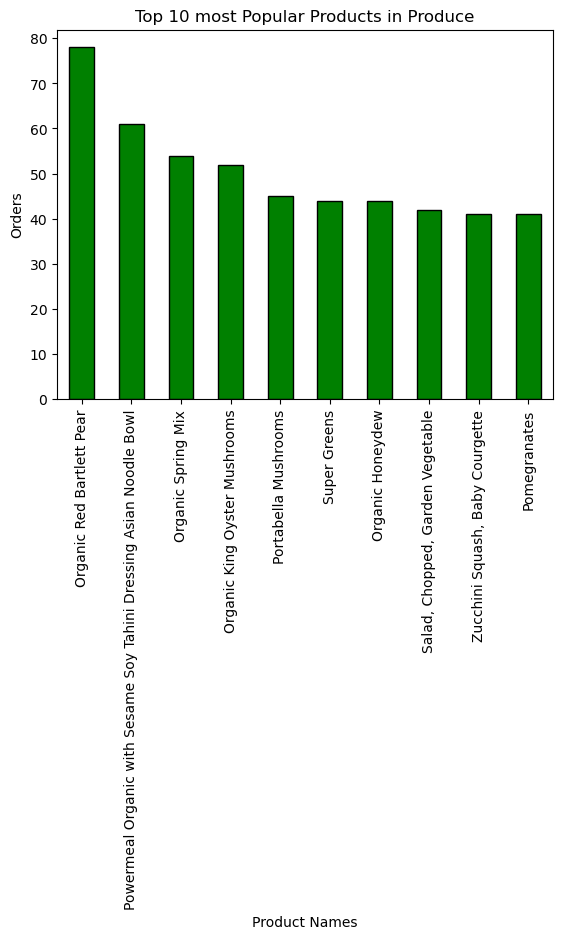

In [87]:
#creating barchart for top 10 most popular products
popular_products_barchart = df_popular_products['product_name'].value_counts()[:10].plot.bar(title='Top 10 most Popular Products in Produce', xlabel='Product Names', ylabel='Orders', color='green', edgecolor='black')
plt.savefig('popular_products_barchart.png')
plt.show()

# Exporting Data

Cleaning up Dataset before Export
#droppping _merge column

In [89]:
#droppping _merge column
df_merged1 = df_merged1.drop(columns=['_merge'])

In [90]:
#Final Column Check
df_merged1

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id_x,product_name,aisle_id,department_id,prices,product_id_y,add_to_cart_order,reordered,price_range_loc,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,order_frequency,order_frequency_flag,First Name,Last Name,Gender,State,Age,Number_of_Dependants,Familial_Status,income,region,spender_flag,regional_flag,activity_flag,department,age_group,income_group,family_size
0,0,0,2539329,1,prior,1,2,8,NaN,1,Chocolate Sandwich Cookies,61,19,5.80,196,1,0,NaN,Mid-range product,Regular busy,Average orders,10,New customer,5.95,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,South,NaN,West,normal activity,snacks,28_37,Lowest_income,Married_kids
1,0,0,2539329,1,prior,1,2,8,NaN,1,Chocolate Sandwich Cookies,61,19,5.80,14084,2,0,NaN,Mid-range product,Regular busy,Average orders,10,New customer,5.95,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,South,NaN,West,normal activity,snacks,28_37,Lowest_income,Married_kids
2,0,0,2539329,1,prior,1,2,8,NaN,1,Chocolate Sandwich Cookies,61,19,5.80,12427,3,0,NaN,Mid-range product,Regular busy,Average orders,10,New customer,5.95,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,South,NaN,West,normal activity,snacks,28_37,Lowest_income,Married_kids
3,0,0,2539329,1,prior,1,2,8,NaN,1,Chocolate Sandwich Cookies,61,19,5.80,26088,4,0,NaN,Mid-range product,Regular busy,Average orders,10,New customer,5.95,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,South,NaN,West,normal activity,snacks,28_37,Lowest_income,Married_kids
4,0,0,2539329,1,prior,1,2,8,NaN,1,Chocolate Sandwich Cookies,61,19,5.80,26405,5,0,NaN,Mid-range product,Regular busy,Average orders,10,New customer,5.95,low spender,20.50,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,South,NaN,West,normal activity,snacks,28_37,Lowest_income,Married_kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462497,48782,48782,2599788,3011,prior,36,4,20,3.00,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,11.30,45866,9,1,NaN,Mid-range product,Slowest days,Average orders,73,Loyal customer,8.75,low spender,4.00,Frequent customer,Kenneth,Corona,Male,Alaska,77,1,married,163316,West,High Spender,South,normal activity,bulk,68_over,Highest_income,Married_kids
462498,48782,48782,2599788,3011,prior,36,4,20,3.00,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,11.30,27695,10,1,NaN,Mid-range product,Slowest days,Average orders,73,Loyal customer,8.75,low spender,4.00,Frequent customer,Kenneth,Corona,Male,Alaska,77,1,married,163316,West,High Spender,South,normal activity,bulk,68_over,Highest_income,Married_kids
462499,48782,48782,2599788,3011,prior,36,4,20,3.00,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,11.30,30489,11,1,NaN,Mid-range product,Slowest days,Average orders,73,Loyal customer,8.75,low spender,4.00,Frequent customer,Kenneth,Corona,Male,Alaska,77,1,married,163316,West,High Spender,South,normal activity,bulk,68_over,Highest_income,Married_kids
462500,48782,48782,2599788,3011,prior,36,4,20,3.00,48778,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,11.30,21137,12,1,NaN,Mid-range product,Slowest days,Average orders,73,Loyal customer,8.75,low spender,4.00,Frequent customer,Kenneth,Corona,Male,Alaska,77,1,married,163316,West,High Spender,South,normal activity,bulk,68_over,Highest_income,Married_kids


# Export

In [91]:
#Export orders_products_active as PKL
df_merged1.to_pickle(os.path.join(path,'02. Data\Prepared data' ,'Orders_products_departments_active.pkl'))